In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
perplexity = np.load('base_model_perplexities/bios_test_points_medium.npy')

In [4]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json") as f:
    factscores = json.load(f)

num_true_all = []
num_total_all = []
frac_correct_facts = []
num_none_decisions = 0
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        num_total_all.append(0)
        num_true_all.append(0)
        frac_correct_facts.append(0)
        num_none_decisions += 1

    else:
        num_total_all.append(len(decison))
        num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))
        frac_correct_facts.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
num_total_all = np.array(num_total_all)
num_true_all = np.array(num_true_all)
frac_correct_facts = np.array(frac_correct_facts)
num_false_all = num_total_all - num_true_all

In [5]:
with open("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5/checkpoint_017000/hf_model/factscores_test_medium.json", "r") as f:
    factscores2 = json.load(f)

num_true_all2 = []
num_total_all2 = []
frac_correct_facts2 = []
num_none_decisions = 0
for i in range(len(factscores2["decisions"])):
    decison = factscores2["decisions"][i]
    if decison == None:
        num_total_all2.append(0)
        num_true_all2.append(0)
        frac_correct_facts2.append(0)
        num_none_decisions += 1

    else:
        num_total_all2.append(len(decison))
        num_true_all2.append(np.sum([fact["is_supported"] for fact in decison]))
        frac_correct_facts2.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
num_total_all2 = np.array(num_total_all2)
num_true_all2 = np.array(num_true_all2)
frac_correct_facts2 = np.array(frac_correct_facts2)
num_false_all2 = num_total_all2 - num_true_all2

In [26]:
with open("ckpts/ppo_rm_bios_llama7B_true2_false-3_kl0pt5_GPT3pt5/checkpoint_006000/hf_model/factscores_test_medium.json", "r") as f:
    factscores3 = json.load(f)

num_true_all3 = []
num_total_all3 = []
frac_correct_facts3 = []
num_none_decisions = 0

for i in range(len(factscores3["decisions"])):
    decison = factscores3["decisions"][i]
    if decison == None:
        num_total_all3.append(0)
        num_true_all3.append(0)
        frac_correct_facts3.append(0)
        num_none_decisions += 1

    else:
        num_total_all3.append(len(decison))
        num_true_all3.append(np.sum([fact["is_supported"] for fact in decison]))
        frac_correct_facts3.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
num_total_all3 = np.array(num_total_all3)
num_true_all3 = np.array(num_true_all3)
frac_correct_facts3 = np.array(frac_correct_facts3)
num_false_all3 = num_total_all3 - num_true_all3


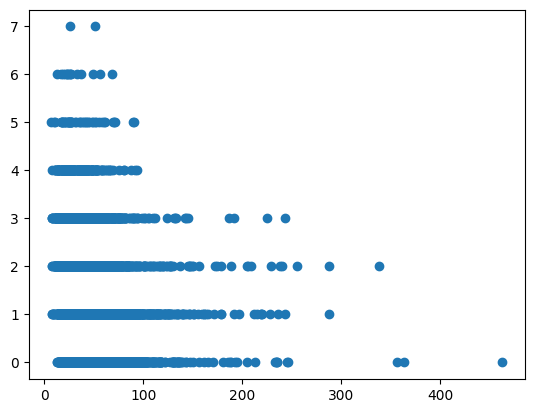

In [6]:
plt.scatter(perplexity, num_true_all)

In [27]:
perplexity_bins = np.percentile(perplexity, [0, 20, 40, 60, 80, 100])

frac_correct_facts_binned = []
num_total_all_binned = []
num_total_all_binned_std = []
num_true_all_binned = []
num_false_all_binned = []
num_false_all_binned_std = []
num_true_all_binned_std = []
for i in range(len(perplexity_bins)-1):
    idxs = np.where((perplexity >= perplexity_bins[i]) & (perplexity < perplexity_bins[i+1]))
    frac_correct_facts_binned.append(np.mean(frac_correct_facts[idxs]))
    num_total_all_binned.append(np.mean(num_total_all[idxs]))
    num_total_all_binned_std.append(np.std(num_total_all[idxs]))
    num_true_all_binned.append(np.mean(num_true_all[idxs]))
    num_false_all_binned.append(np.mean(num_false_all[idxs]))
    num_false_all_binned_std.append(np.std(num_false_all[idxs]))
    num_true_all_binned_std.append(np.std(num_true_all[idxs]))


frac_correct_facts_binned2 = []
num_total_all_binned2 = []
num_total_all_binned_std2 = []
num_true_all_binned2 = []
num_false_all_binned2 = []
num_false_all_binned_std2 = []
num_true_all_binned_std2 = []
for i in range(len(perplexity_bins)-1):
    idxs = np.where((perplexity >= perplexity_bins[i]) & (perplexity < perplexity_bins[i+1]))
    frac_correct_facts_binned2.append(np.mean(frac_correct_facts2[idxs]))
    num_total_all_binned2.append(np.mean(num_total_all2[idxs]))
    num_total_all_binned_std2.append(np.std(num_total_all2[idxs]))
    num_true_all_binned2.append(np.mean(num_true_all2[idxs]))
    num_false_all_binned2.append(np.mean(num_false_all2[idxs]))
    num_false_all_binned_std2.append(np.std(num_false_all2[idxs]))
    num_true_all_binned_std2.append(np.std(num_true_all2[idxs]))


frac_correct_facts_binned3 = []
num_total_all_binned3 = []
num_total_all_binned_std3 = []
num_true_all_binned3 = []
num_false_all_binned3 = []
num_false_all_binned_std3 = []
num_true_all_binned_std3 = []
for i in range(len(perplexity_bins)-1):
    idxs = np.where((perplexity >= perplexity_bins[i]) & (perplexity < perplexity_bins[i+1]))
    frac_correct_facts_binned3.append(np.mean(frac_correct_facts3[idxs]))
    num_total_all_binned3.append(np.mean(num_total_all3[idxs]))
    num_total_all_binned_std3.append(np.std(num_total_all3[idxs]))
    num_true_all_binned3.append(np.mean(num_true_all3[idxs]))
    num_false_all_binned3.append(np.mean(num_false_all3[idxs]))
    num_false_all_binned_std3.append(np.std(num_false_all3[idxs]))
    num_true_all_binned_std3.append(np.std(num_true_all3[idxs]))

In [28]:
num_true_all_binned = np.array(num_true_all_binned)
num_false_all_binned = np.array(num_false_all_binned)

num_true_all_binned2 = np.array(num_true_all_binned2)
num_false_all_binned2 = np.array(num_false_all_binned2)

num_true_all_binned3 = np.array(num_true_all_binned3)
num_false_all_binned3 = np.array(num_false_all_binned3)

(0.0, 3.0)

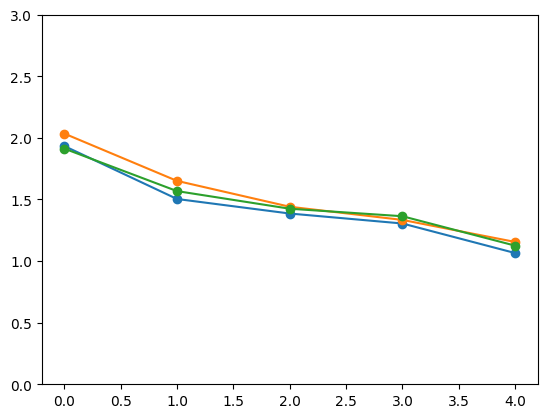

In [29]:
plt.plot([_ for _ in range(len(num_true_all_binned))], num_true_all_binned, 'o-')
# plt.fill_between([0, 1, 2, 3], num_true_all_binned - num_true_all_binned_std, num_true_all_binned + num_true_all_binned_std, alpha=0.5)
plt.plot([_ for _ in range(len(num_true_all_binned))], num_true_all_binned2, 'o-')
# plt.fill_between([0, 1, 2, 3], num_true_all_binned2 - num_true_all_binned_std2, num_true_all_binned2 + num_true_all_binned_std2, alpha=0.5)

plt.plot([_ for _ in range(len(num_true_all_binned))], num_true_all_binned3, 'o-')

plt.ylim(0, 3)

(0.0, 2.5)

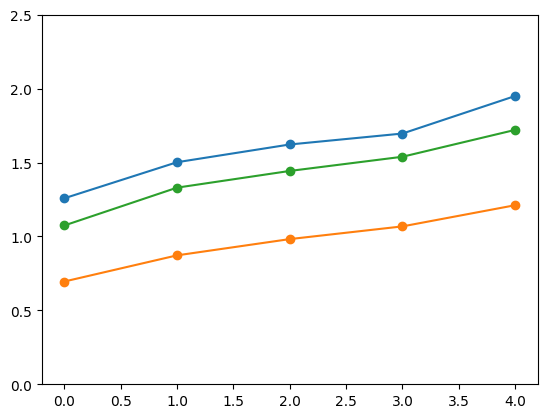

In [30]:
plt.plot([_ for _ in range(len(num_true_all_binned))], num_false_all_binned, 'o-')
# plt.fill_between([0, 1, 2, 3], num_false_all_binned - num_false_all_binned_std, num_false_all_binned + num_false_all_binned_std, alpha=0.5)
plt.plot([_ for _ in range(len(num_true_all_binned))], num_false_all_binned2, 'o-')
# plt.fill_between([0, 1, 2, 3], num_false_all_binned2 - num_false_all_binned_std2, num_false_all_binned2 + num_false_all_binned_std2, alpha=0.5)

plt.plot([_ for _ in range(len(num_true_all_binned))], num_false_all_binned3, 'o-')

plt.ylim(0, 2.5)

In [10]:
model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

# sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

sft_eval_A_to_D_probs = (np.load(model_path + f"eval_A_to_D_probs_truthA.npy")[:, 0]+
    np.load(model_path + f"eval_A_to_D_probs_truthB.npy")[:, 1]+
    np.load(model_path + f"eval_A_to_D_probs_truthC.npy")[:, 2]+
    np.load(model_path + f"eval_A_to_D_probs_truthD.npy")[:, 3])/4

In [6]:
mmlu_perplexity = np.load('base_model_perplexities/sft_mmlu_test.npy')

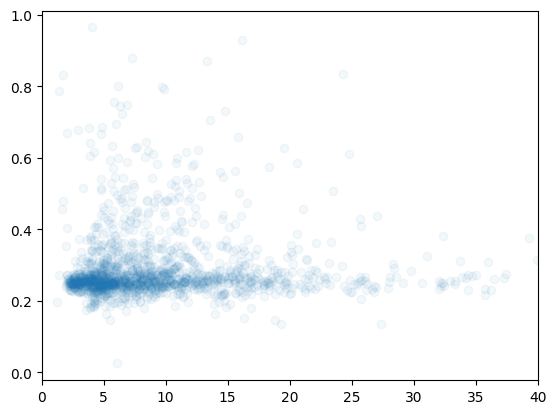

In [13]:
plt.scatter(mmlu_perplexity, sft_eval_A_to_D_probs, alpha=0.05)
plt.xlim(0, 40)
plt.savefig("delete.jpg")
